In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Scale 변환 : 평균, 표준편자 기준
from sklearn.preprocessing import StandardScaler


# 주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load Data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/posco/bigdata/data/movie_meta_cleaned_ver7.csv', engine='python', encoding='utf-8')
df.head(2)



,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,legs,share,inf_income_usa,theater_opening,theater_total,src,director,awards,poster,metascore,release_dvd,big_awards_num,awards_win_num,awards_nomin_num,reviews_users,reviews_critics,prd_mthd,budget,series_new,actor_1,actor_2,actor_3,actor_4,income_opening,votes,income_usa,income_int,income_ww,item_id,inv_exist,contract_year,inf,genre_action,genre_adventure,genre_drama,genre_sci-fi,genre_fantasy,genre_thriller,genre_animation,genre_family,genre_musical,genre_comedy,genre_romance,genre_mystery,genre_war,genre_western,genre_history,genre_sport,genre_horror,genre_crime,genre_music,genre_biography,genre_documentary,country_1,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,positive_probability,english,dvd,blu
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,40683.0,136.0,PG-13,6.6,35478573.0,58936309.0,94414882.0,2.673973,23.053668,276934662.0,4155.0,4164.0,based on theme park ride,Rob Marshall,3 wins & 31 nominations.,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,45.0,18-10-2011,0.0,3.0,34.0,529.0,467.0,live action,379000000.0,1.0,Johnny Depp,Pen챕lope Cruz,Geoffrey Rush,Ian McShane,90151958.0,460865.0,241063875.0,804600000.0,1.045664e+09,NaN,0.0,NaN,1.148802,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USA,UK,NaN,0.147175,NaN,NaN,NaN,BUENA VISTA,6.0,1.0,650.0,0.977014,1,1,1
1,tt2395427,Avengers: Age of Ultron,2015.0,42125.0,141.0,PG-13,7.3,33569045.0,55802159.0,89371204.0,2.399766,32.715702,496031246.0,4276.0,4276.0,based on comic/graphic novel,Joss Whedon,8 wins & 47 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,66.0,2/10/2015,0.0,8.0,55.0,1283.0,689.0,animation/live action,365000000.0,1.0,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Chris Evans,191271109.0,697604.0,459005868.0,944008095.0,1.403014e+09,I-1048,1.0,2015.0,1.080664,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USA,NaN,NaN,0.073134,1042.255387,755.774309,286.481078,BUENA VISTA,6.0,1.0,650.0,0.861669,1,1,1


In [0]:

'''
release_date : 발매일
runtime : 상영시간
imdb_score : imdb 평점
'dvd_sales' : dvd 판매수입
'blu_sales' : blu-ray 판매수입
'total_sales' : dvd, blu-ray 판매수입
'legs' : domestic box office/biggest weekend (낮을수록 첫주버프가 강함)
'share' : 미국매출/전세계 매출 (높을수록 미국에서 잘팔린 것)
'inf_income_usa' : 인플레이션 수치 반영한 income_usa
'theater_opening' : 첫주에 연 영화관
'theater_total' : 상영한 영화관
'metascore' : imdb내 metascore
'release_dvd' : dvd 발매일
'big_awards_num' : 골든글로브, 아카데미 등 주요 영화제 수상/노미네이트 여부(0,1 더미)
'awards_win_num' : awards 수상횟수
'awards_nomin_num' : awards 후보에 오른 횟수
'reviews_users' : 리뷰에 참여한 유저수
'reviews_critics' : 리뷰에 참여한 비평가수
'budget' : 영화 예산
'series_new' : 시리즈물 여부
'income_opening' : 개봉 첫 주 매출
'votes' : score 평가자 수
'income_usa' : 국내 매출
'income_int' : 국외 매출
'income_ww' : 전체 매출
'item_id' : 보유 영화 id
'inv_exist' : 영화 보유 여부
'inf' : 인플레이션 수치
'dvd_over_income' : dvd 판매매출 / 영화 국내매출
'movie_down_sales' : 좋은영화 영화별 다운로드 매출
'contract_price_inf' : 계약가격 (inf적용)
'net_profit' : 영화별 순수익
'studio_score' : 스튜디오 평가점수
'price_class' : 영화 가격 등급
'contract_price' : 계약 가격
'positive_probability' : 긍정 수치
'''

"\nrelease_date : 발매일\nruntime : 상영시간\nimdb_score : imdb 평점\n'dvd_sales' : dvd 판매수입\n'blu_sales' : blu-ray 판매수입\n'total_sales' : dvd, blu-ray 판매수입\n'legs' : domestic box office/biggest weekend (낮을수록 첫주버프가 강함)\n'share' : 미국매출/전세계 매출 (높을수록 미국에서 잘팔린 것)\n'inf_income_usa' : 인플레이션 수치 반영한 income_usa\n'theater_opening' : 첫주에 연 영화관\n'theater_total' : 상영한 영화관\n'metascore' : imdb내 metascore\n'release_dvd' : dvd 발매일\n'big_awards_num' : 골든글로브, 아카데미 등 주요 영화제 수상/노미네이트 여부(0,1 더미)\n'awards_win_num' : awards 수상횟수\n'awards_nomin_num' : awards 후보에 오른 횟수\n'reviews_users' : 리뷰에 참여한 유저수\n'reviews_critics' : 리뷰에 참여한 비평가수\n'budget' : 영화 예산\n'series_new' : 시리즈물 여부\n'income_opening' : 개봉 첫 주 매출\n'votes' : score 평가자 수\n'income_usa' : 국내 매출\n'income_int' : 국외 매출\n'income_ww' : 전체 매출\n'item_id' : 보유 영화 id\n'inv_exist' : 영화 보유 여부\n'inf' : 인플레이션 수치\n'dvd_over_income' : dvd 판매매출 / 영화 국내매출\n'movie_down_sales' : 좋은영화 영화별 다운로드 매출\n'contract_price_inf' : 계약가격 (inf적용)\n'net_profit' : 영화별 순수익\n'studio_score' : 스튜디오 평가점수\n'p

In [0]:
# PCA를 진행하기 위해 연속형 변수들을 활용
target=df[['release_date', 'runtime', 'imdb_score', 'dvd_sales', 'blu_sales', 'total_sales', 'legs', 'share', 'inf_income_usa', 'theater_opening', 'theater_total', 'metascore', 'big_awards_num', 'awards_win_num', 'awards_nomin_num', 'reviews_users', 'reviews_critics', 'budget', 'income_opening', 'votes', 'income_usa', 'income_int', 'income_ww', 'inf', 'dvd_over_income', 'movie_down_sales', 'contract_price_inf', 'net_profit', 'studio_score', 'price_class', 'contract_price', 'positive_probability']]

target.head(2)


,release_date,runtime,imdb_score,dvd_sales,blu_sales,total_sales,legs,share,inf_income_usa,theater_opening,theater_total,metascore,big_awards_num,awards_win_num,awards_nomin_num,reviews_users,reviews_critics,budget,income_opening,votes,income_usa,income_int,income_ww,inf,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio_score,price_class,contract_price,positive_probability
0,40683.0,136.0,6.6,35478573.0,58936309.0,94414882.0,2.673973,23.053668,276934662.0,4155.0,4164.0,45.0,0.0,3.0,34.0,529.0,467.0,379000000.0,90151958.0,460865.0,241063875.0,804600000.0,1.045664e+09,1.148802,0.147175,NaN,NaN,NaN,6.0,1.0,650.0,0.977014
1,42125.0,141.0,7.3,33569045.0,55802159.0,89371204.0,2.399766,32.715702,496031246.0,4276.0,4276.0,66.0,0.0,8.0,55.0,1283.0,689.0,365000000.0,191271109.0,697604.0,459005868.0,944008095.0,1.403014e+09,1.080664,0.073134,1042.255387,755.774309,286.481078,6.0,1.0,650.0,0.861669


In [0]:
# 산점도 행렬
# sns.pairplot(target)


In [0]:
# 변수 별 상관계수를 파악하여 변수간의 상관성을 봄(결합될 수 있는 가능성?)

target.corr().round(3)

,release_date,runtime,imdb_score,dvd_sales,blu_sales,total_sales,legs,share,inf_income_usa,theater_opening,theater_total,metascore,big_awards_num,awards_win_num,awards_nomin_num,reviews_users,reviews_critics,budget,income_opening,votes,income_usa,income_int,income_ww,inf,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio_score,price_class,contract_price,positive_probability
release_date,1.000,-0.145,-0.175,-0.241,0.031,-0.065,0.006,-0.051,-0.139,0.163,0.169,-0.169,-0.244,0.063,0.120,0.049,0.336,0.196,0.144,-0.001,0.043,0.124,0.088,-0.227,0.022,-0.370,-0.133,-0.284,-0.127,-0.093,-0.119,0.056
runtime,-0.145,1.000,0.382,0.153,0.208,0.171,-0.021,-0.010,0.221,0.028,0.060,0.288,0.346,0.245,0.265,0.319,0.201,0.258,0.165,0.036,0.218,0.234,0.239,-0.001,-0.050,-0.031,0.179,-0.100,0.117,0.264,0.268,0.181
imdb_score,-0.175,0.382,1.000,0.181,0.278,0.215,-0.009,-0.018,0.252,-0.142,-0.080,0.751,0.491,0.385,0.408,0.332,0.347,0.051,0.079,0.074,0.228,0.199,0.222,0.029,-0.046,-0.098,0.776,-0.400,0.046,0.387,0.346,0.160
dvd_sales,-0.241,0.153,0.181,1.000,0.442,0.948,-0.005,-0.021,0.528,0.336,0.359,0.158,0.237,0.153,0.140,0.320,0.168,0.404,0.463,0.085,0.536,0.435,0.490,0.171,-0.023,0.213,0.143,0.137,0.244,0.235,0.285,0.011
blu_sales,0.031,0.208,0.278,0.442,1.000,0.707,-0.012,-0.032,0.622,0.421,0.447,0.195,0.282,0.198,0.233,0.434,0.497,0.605,0.656,0.099,0.736,0.707,0.742,-0.041,-0.029,-0.065,0.200,-0.140,0.281,0.332,0.381,0.036
total_sales,-0.065,0.171,0.215,0.948,0.707,1.000,-0.007,-0.027,0.610,0.412,0.440,0.177,0.260,0.188,0.193,0.376,0.319,0.529,0.601,0.104,0.675,0.594,0.646,0.028,-0.027,0.174,0.203,0.077,0.274,0.283,0.336,0.024
legs,0.006,-0.021,-0.009,-0.005,-0.012,-0.007,1.000,0.006,-0.001,0.010,0.009,0.000,-0.009,-0.004,-0.005,0.001,-0.001,0.001,-0.010,0.665,0.006,0.009,-0.008,-0.005,-0.001,0.139,-0.012,0.131,0.012,-0.007,-0.002,0.013
share,-0.051,-0.010,-0.018,-0.021,-0.032,-0.027,0.006,1.000,-0.004,-0.009,-0.012,-0.008,-0.006,-0.010,-0.012,-0.019,-0.032,-0.024,-0.011,-0.000,-0.012,-0.334,-0.021,0.017,-0.012,0.130,0.038,0.103,-0.006,0.003,0.001,-0.009
inf_income_usa,-0.139,0.221,0.252,0.528,0.622,0.610,-0.001,-0.004,1.000,0.458,0.501,0.204,0.343,0.248,0.257,0.495,0.321,0.515,0.698,0.106,0.911,0.717,0.819,0.069,-0.041,-0.060,0.159,-0.119,0.349,0.406,0.480,-0.022
theater_opening,0.163,0.028,-0.142,0.336,0.421,0.412,0.010,-0.009,0.458,1.000,0.974,-0.252,-0.077,-0.051,-0.020,0.306,0.350,0.628,0.639,0.051,0.569,0.475,0.526,-0.060,-0.083,-0.191,-0.223,-0.085,0.507,0.173,0.332,-0.096


In [0]:
# temp_x = df[['release_date', 'runtime', 'imdb_score', 'legs', 'share', 'inf_income_usa', 'theater_opening', 'theater_total', 'metascore' ]]

# 데이터별 범위가 다르기 때문에 스케일을 맞춰준다.
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(target)
df_scaled = pd.DataFrame(nd_scaled, columns=target.columns)
df_scaled.describe().round(3)


,release_date,runtime,imdb_score,dvd_sales,blu_sales,total_sales,legs,share,inf_income_usa,theater_opening,theater_total,metascore,big_awards_num,awards_win_num,awards_nomin_num,reviews_users,reviews_critics,budget,income_opening,votes,income_usa,income_int,income_ww,inf,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio_score,price_class,contract_price,positive_probability
count,4745.000,4745.000,4745.000,2213.000,1718.000,2304.000,4441.000,4587.000,4588.000,4303.000,4303.000,4366.000,4745.000,4745.000,4745.000,4745.000,4745.000,4573.000,4467.000,4745.000,4587.000,4395.000,4465.000,4586.000,2164.000,106.000,106.000,106.000,4737.000,4587.000,4579.000,4745.000
mean,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.005,1.005,1.005,1.000,1.000,1.000,1.000
min,-7.300,-3.380,-4.663,-0.559,-0.521,-0.597,-0.016,-0.066,-0.711,-1.420,-1.625,-2.928,-0.598,-0.395,-0.475,-0.772,-1.275,-0.857,-0.638,-0.148,-0.715,-0.503,-0.601,-0.753,-0.066,-1.561,-1.318,-1.792,-2.494,-0.445,-1.340,-1.727
25%,-0.372,-0.697,-0.584,-0.478,-0.467,-0.507,-0.016,-0.039,-0.612,-1.154,-0.910,-0.734,-0.598,-0.395,-0.432,-0.536,-0.714,-0.634,-0.617,-0.128,-0.611,-0.492,-0.532,-0.217,-0.062,-0.820,-0.780,-0.718,-0.494,-0.445,-0.590,-1.027
50%,0.199,-0.200,0.096,-0.295,-0.359,-0.320,-0.016,-0.027,-0.343,0.225,0.183,-0.021,-0.598,-0.286,-0.326,-0.304,-0.261,-0.344,-0.302,-0.091,-0.331,-0.372,-0.360,-0.106,-0.056,-0.140,-0.525,-0.062,0.839,-0.445,-0.090,0.474
75%,0.702,0.496,0.679,0.082,-0.007,0.088,-0.016,-0.007,0.198,0.810,0.802,0.692,1.673,-0.068,-0.049,0.143,0.439,0.262,0.163,-0.007,0.181,0.016,0.088,0.054,-0.046,0.987,1.036,0.639,0.839,0.417,0.160,0.901
max,1.198,8.048,2.815,14.643,13.017,12.272,66.611,64.814,11.235,2.039,2.077,2.501,1.673,13.117,11.660,16.168,6.364,7.980,11.819,45.167,10.162,16.142,14.504,63.096,26.851,2.180,1.385,2.359,0.839,3.435,3.286,0.984


In [0]:
nd_scaled[:-5].round(3)


array([[ 0.53 ,  1.34 ,  0.193, ..., -0.445, -0.09 ,  0.93 ],
       [ 0.851,  1.589,  0.873, ..., -0.445, -0.09 ,  0.615],
       [ 1.095,  2.334,  2.038, ...,  3.435,  3.286, -1.315],
       ...,
       [ 0.929,  1.688,  0.679, ..., -0.445, -0.59 ,  0.956],
       [ 0.555,  1.788, -0.584, ..., -0.445, -0.59 ,  0.973],
       [ 1.087, -0.15 ,  1.067, ...,    nan,    nan,  0.976]])

In [0]:
# nan 값 대체하기(평균: 0, 분산: 1) => 평균 0으로 nan 값은 대체
# nan 값이 존재하면 PCA가 돌아가지 않음.
df_scaled = df_scaled.fillna(0)
df_scaled[:5].round(3)

,release_date,runtime,imdb_score,dvd_sales,blu_sales,total_sales,legs,share,inf_income_usa,theater_opening,theater_total,metascore,big_awards_num,awards_win_num,awards_nomin_num,reviews_users,reviews_critics,budget,income_opening,votes,income_usa,income_int,income_ww,inf,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio_score,price_class,contract_price,positive_probability
0,0.530,1.340,0.193,0.435,3.104,1.616,-0.016,-0.051,1.956,1.754,1.774,-0.515,-0.598,-0.231,0.249,0.406,2.314,7.980,3.720,0.349,2.733,6.097,5.060,-0.201,-0.061,0.000,0.000,0.000,0.839,-0.445,-0.090,0.930
1,0.851,1.589,0.873,0.381,2.911,1.498,-0.016,-0.044,4.065,1.846,1.866,0.637,-0.598,0.041,0.696,2.084,4.020,7.654,8.608,0.605,5.850,7.240,6.995,-0.238,-0.063,1.094,-0.606,1.240,0.839,-0.445,-0.090,0.615
2,1.095,2.334,2.038,0.105,4.260,1.781,-0.016,-0.044,5.825,1.997,2.027,0.746,1.673,2.003,1.952,8.558,3.375,6.138,11.819,0.660,8.994,10.731,10.490,-0.282,-0.064,-1.511,1.036,-1.792,0.839,3.435,3.286,-1.315
3,0.205,2.881,0.679,8.239,-0.051,6.945,-0.016,-0.045,3.234,1.912,1.936,-0.241,1.673,0.695,0.888,2.078,1.238,6.138,4.908,0.470,3.711,4.861,4.615,-0.106,-0.031,1.026,-0.525,1.145,0.839,-0.445,-0.090,0.655
4,1.059,0.595,-0.001,-0.014,1.969,0.808,-0.016,-0.043,1.528,1.674,1.682,-0.515,-0.598,-0.286,-0.156,3.598,2.522,6.138,3.898,0.233,2.561,2.999,2.950,-0.274,-0.063,-0.877,-0.677,-0.528,0.839,-0.445,-0.090,0.288


In [0]:
# 주성분 분석
# 일단 대략적으로 12개 columns 로 해보기
num = 12
pca = PCA(n_components=num)
nd_pca = pca.fit_transform(df_scaled)

lst_prin = []
for i in range(1,num+1):
    lst_prin.append("Prin" + str(i))

# print(lst_prin)
# 주성분 점수 저장
df_pca = pd.DataFrame(nd_pca, columns=lst_prin)
df_pca.shape

(4745, 12)

In [0]:
# 변수의 크기별 고유값과 누적비율을 비교해서 적용하며 스케일링을 했을 경우에는 고유값 기준을 본다.
# EigenValues > 1 을 기준으로 끊는다.

df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,num+1)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)


,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,7.836,0.300,0.300
1,2,3.526,0.135,0.436
2,3,1.783,0.068,0.504
3,4,1.605,0.062,0.566
4,5,1.442,0.055,0.621
5,6,1.082,0.041,0.662
6,7,0.964,0.037,0.699
7,8,0.928,0.036,0.735
8,9,0.891,0.034,0.769
9,10,0.758,0.029,0.798


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

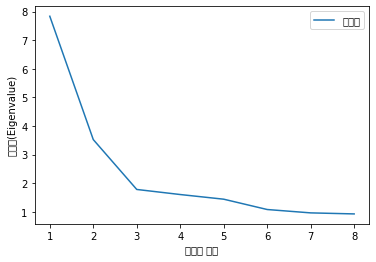

In [0]:
# 고유값을 그래프로 확인해보기

plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")

plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

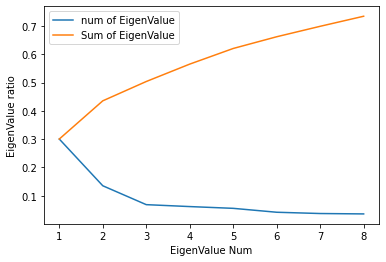

In [0]:
# 누적수치 또한 보면서 비교하기

plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="num of EigenValue")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="Sum of EigenValue")
plt.ylabel("EigenValue ratio")
plt.xlabel("EigenValue Num")
plt.legend(loc="best")

In [0]:
# 생성된 변수별 각 기존 변수들의 반영도를 확인.

x_cols = pd.DataFrame({"Feature":target.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns = lst_prin)], axis =1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8
0,release_date,-0.017,0.107,0.570,0.004,0.211,0.054,-0.036,0.147
1,runtime,-0.130,-0.178,-0.109,0.044,-0.076,0.501,-0.047,-0.216
2,imdb_score,-0.138,-0.343,-0.085,0.022,-0.117,0.163,0.060,-0.170
3,dvd_sales,-0.112,0.039,-0.055,0.021,-0.180,-0.080,-0.011,0.169
4,blu_sales,-0.127,0.039,0.016,0.026,-0.142,-0.050,-0.014,0.110
5,total_sales,-0.145,0.052,-0.026,0.028,-0.201,-0.084,-0.017,0.184
6,legs,-0.004,-0.000,0.030,-0.688,-0.089,0.017,0.006,-0.017
7,share,0.007,0.000,-0.060,-0.011,-0.022,-0.166,-0.955,-0.216
8,inf_income_usa,-0.283,0.059,-0.174,0.018,-0.174,-0.119,0.011,0.105
9,theater_opening,-0.196,0.305,-0.041,-0.025,0.250,0.091,-0.003,-0.149


In [0]:
# 클러스터링 (K-means)
from sklearn.cluster import KMeans
import time

# 주성분 개수 고정
select_num = 6
num_clusters = 4

lst_select_prim = []
for i in range(1, select_num+1):
    lst_select_prim.append('Prin'+str(i))


# K means 
# category로 clustering 한 군집의 번호를 넣어줌
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(df_pca[lst_select_prim])
df_cluster = pd.DataFrame()
df['category'] = idx
df.category.value_counts()

3    2192
0    1929
1     406
2     218
Name: category, dtype: int64

In [0]:
# category에 무슨 영화가 들어갔는지 한번 확인해 보기

df.loc[df['category'] == 1, 'title']

74                        Blade Runner 2049
81                                     Hugo
87                         Edge of Tomorrow
129     The Curious Case of Benjamin Button
160                      Mad Max: Fury Road
                       ...                 
4562                                  Selma
4620                           Toni Erdmann
4654                        The Hurt Locker
4701                           Paddington 2
4709                         V for Vendetta
Name: title, Length: 406, dtype: object

In [0]:
# 2차원에 표현하기 위해 다음과 같이 두가지 변수만을 활용하여 구분을 한다.

df['x_coord'] = df_pca['Prin1'].to_list()
df['y_coord'] = df_pca['Prin2'].to_list()
df.head(2)

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,legs,share,inf_income_usa,theater_opening,theater_total,src,director,awards,poster,metascore,release_dvd,big_awards_num,awards_win_num,awards_nomin_num,reviews_users,reviews_critics,prd_mthd,budget,series_new,actor_1,actor_2,actor_3,actor_4,income_opening,votes,income_usa,income_int,income_ww,item_id,inv_exist,...,genre_action,genre_adventure,genre_drama,genre_sci-fi,genre_fantasy,genre_thriller,genre_animation,genre_family,genre_musical,genre_comedy,genre_romance,genre_mystery,genre_war,genre_western,genre_history,genre_sport,genre_horror,genre_crime,genre_music,genre_biography,genre_documentary,country_1,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,positive_probability,english,dvd,blu,category,x_coord,y_coord,color
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,40683.0,136.0,PG-13,6.6,35478573.0,58936309.0,94414882.0,2.673973,23.053668,276934662.0,4155.0,4164.0,based on theme park ride,Rob Marshall,3 wins & 31 nominations.,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,45.0,18-10-2011,0.0,3.0,34.0,529.0,467.0,live action,379000000.0,1.0,Johnny Depp,Pen챕lope Cruz,Geoffrey Rush,Ian McShane,90151958.0,460865.0,241063875.0,804600000.0,1.045664e+09,NaN,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USA,UK,NaN,0.147175,NaN,NaN,NaN,BUENA VISTA,6.0,1.0,650.0,0.977014,1,1,1,2,9.956884,-5.233215,#fee08b
1,tt2395427,Avengers: Age of Ultron,2015.0,42125.0,141.0,PG-13,7.3,33569045.0,55802159.0,89371204.0,2.399766,32.715702,496031246.0,4276.0,4276.0,based on comic/graphic novel,Joss Whedon,8 wins & 47 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,66.0,2/10/2015,0.0,8.0,55.0,1283.0,689.0,animation/live action,365000000.0,1.0,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Chris Evans,191271109.0,697604.0,459005868.0,944008095.0,1.403014e+09,I-1048,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USA,NaN,NaN,0.073134,1042.255387,755.774309,286.481078,BUENA VISTA,6.0,1.0,650.0,0.861669,1,1,1,2,14.943639,-5.908412,#fee08b


In [0]:
# Bokeh을 이용한 plotting
# 라이브러리를 사용한 것으로 다른 것들을 활용해도 좋음

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from bokeh.palettes import brewer

output_notebook()


In [0]:
# 어떤 색을 쓸지 category 숫자별 표현


colors = brewer['Spectral'][len(df['category'].unique())]

colormap = {i: colors[i] for i in df['category'].unique()}

colors = [colormap[x] for x in df['category']]

df['color'] = colors

In [0]:
plot_data = ColumnDataSource(
    data=df.to_dict(orient="list")
)

In [0]:
plot = figure(title="Movie Clustering",
              plot_width=650,
              plot_height= 650,
              active_scroll = 'wheel_zoom',
              output_backend='webgl'
              )

In [0]:
# 마우스 올릴시(Hover) 무슨 값을 띄울지

plot.add_tools(
    HoverTool(
    tooltips='@title'
    )
)

In [0]:
# x와 y 2차원으로 표현.
# 위에서 prin 숫자만 바꿔주면 자동으로 들어가짐.
# 3차원으로 할꺼면 라이브러리 찾아보기
# https://docs.bokeh.org/en/latest/docs/reference.html#refguide
plot.circle(source=plot_data,
            x='x_coord',
            y='y_coord',
            line_alpha=0.3,
            fill_alpha=0.2,
            size=10,
            fill_color='color',
            line_color='color',)

GlyphRenderer(id='1249', ...)

In [0]:
# 구분선 지우기

plot.title.text_font_size = value('16pt')
plot.xaxis.visible = False
plot.yaxis.visible = False
plot.grid.grid_line_color = None
plot.outline_line_color = None

show(plot)

# 참고사이트 
[트위터 군집(Bokeh 참고)](https://beomi.github.io/2020/01/05/Clustering_Twitter_Users/#more)


[비지도학습(클러스터링, 차원축소)](https://yamalab.tistory.com/118)
